In [3]:
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils import load_data, load_test_data
from utils import num_classes, epochs, batch_size

Using TensorFlow backend.


In [8]:
X_train, y_train, X_valid, y_valid = load_data(test_size=0.1, img_size=224)

In [9]:
# a classic CNN model
model_name = 'classic_CNN_19'
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))

model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation(activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
batch_normalization_20 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
activation_20 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_21 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
activation_21 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
__________

In [10]:
def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-5
    if epoch > 120:
        lr *= 1e-1
    elif epoch > 90:
        lr *= 1e-1
    elif epoch > 60:
        lr *= 1e-1
    elif epoch > 30:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [11]:
# Data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    cval=0)

optimizer = keras.optimizers.Adam(lr=lr_schedule(0))

model_path = './{}.h5'.format(model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])
# Fit the model on the batches generated by datagen.flow().
batch_size = 32
epochs = 200
model_history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size),
                                    epochs = epochs,
                                    validation_data = (X_valid, y_valid),
                                    callbacks = [checkpoint, earlystop,lr_scheduler],
                                    verbose=2)

Learning rate:  1e-05
Epoch 1/200
Learning rate:  1e-05
 - 36s - loss: 2.4809 - acc: 0.2115 - val_loss: 2.3567 - val_acc: 0.3077

Epoch 00001: val_loss improved from inf to 2.35673, saving model to ./classic_CNN_19.h5
Epoch 2/200
Learning rate:  1e-05
 - 32s - loss: 2.0509 - acc: 0.3589 - val_loss: 2.1080 - val_acc: 0.3244

Epoch 00002: val_loss improved from 2.35673 to 2.10796, saving model to ./classic_CNN_19.h5
Epoch 3/200
Learning rate:  1e-05
 - 32s - loss: 1.8635 - acc: 0.4185 - val_loss: 1.9205 - val_acc: 0.3110

Epoch 00003: val_loss improved from 2.10796 to 1.92053, saving model to ./classic_CNN_19.h5
Epoch 4/200
Learning rate:  1e-05
 - 32s - loss: 1.7513 - acc: 0.4654 - val_loss: 1.7428 - val_acc: 0.4448

Epoch 00004: val_loss improved from 1.92053 to 1.74280, saving model to ./classic_CNN_19.h5
Epoch 5/200
Learning rate:  1e-05
 - 32s - loss: 1.6680 - acc: 0.5076 - val_loss: 1.9787 - val_acc: 0.4214

Epoch 00005: val_loss did not improve from 1.74280
Epoch 6/200
Learning ra

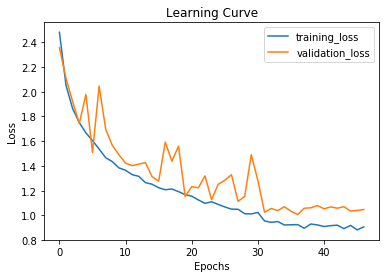

In [12]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

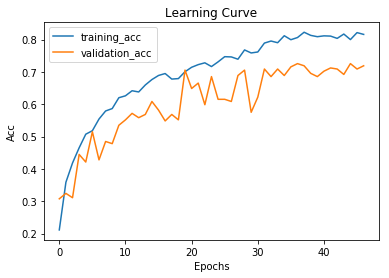

In [13]:
training_acc = model_history.history['acc']
val_acc = model_history.history['val_acc']

plt.plot(training_acc, label="training_acc")
plt.plot(val_acc, label="validation_acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [1]:
ensembling_models = {
    'classic_CNN_19': {'img_size': 224},
    'classic_CNN': {'img_size': 224}
}

In [5]:
for key in ensembling_models.keys():
    print(key)
    img_size = ensembling_models[key]['img_size']
    model = load_model('./{}.h5'.format(key))
    X_test, X_id = load_test_data()
    ensembling_models[key]['y_test_pred_prob'] = model.predict(X_test)

classic_CNN_19
classic_CNN


In [6]:
num_models = float(len(ensembling_models.keys()))
y_test_pred_prob = 0
for key in ensembling_models.keys():
    y_test_pred_prob += ensembling_models[key]['y_test_pred_prob']

y_test_pred_prob /= num_models

In [7]:
y_test_pred = y_test_pred_prob.argmax(axis=-1)

In [8]:
import numpy as np
import pandas as pd
y_test_pred_df = pd.DataFrame({'id': np.array(X_id), 'class':y_test_pred}).sort_values(by='id')

In [11]:
sub_data = pd.read_csv('img-submission.csv')
sub_data = sub_data.drop(["class"], axis=1)
y_test_pred_df_csv = pd.merge(sub_data, y_test_pred_df, how='left', on=['id'])

In [12]:
y_test_pred_df_csv.head()

,id,class
0,c117693e1cf24a5232090d1548cb11d4e5ea0df65680c4...,12
1,96baacc2e97886a998807ce197574821a6dc83c227c746...,10
2,f9bd26db23eb9b544ca78be79b11b4d1259e802885861d...,5
3,b42bcd8e6645fcc2ac40ee44b7dc8d74a77081d0aea7a1...,5
4,5bc53cef9168882f0ff67a81b3e7269f62b7fd5343d06d...,2


In [13]:
y_test_pred_df_csv.to_csv('./whereamiCNN.csv', index=False)